In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# !gdown 1RPoMGF2BbC-ZQMmUcb2GKUGegGKd5lci -O /iter1/
# !gdown 1MjpD1aoNz-OByq6smcoWeEGhGtOZc8mO -O /iter1/

!gdown 1-29CzlvylapD87nqOJKHQHj-qFTejWfc -O /iter2/
!gdown 1-53EzR6ylKtHbfAZfgESbPbwiuWik1_j -O /iter2/
!gdown 1-5Z86wBfQA8M0ICy3kxDjDPLL_BFHIyR -O /iter2/
!gdown 1-5aQvbP2SWnQ8w5e-MT8as60Ve7XguYp -O /iter2/
!gdown 1-7V9YhMF72hpRxuuQ4Xa4dMqlJmjSPqW -O /iter2/
!gdown 1-8JG_uHQxkFubNSzEQq1afaqiVxcN668 -O /iter2/
!gdown 1-8dd68BY8nH20atHJLTmP8MoiIvlE5aC -O /iter2/
!gdown 1-915c0kz8MPfK-mnhMK4uAE9qVLpGLJY -O /iter2/
!gdown 1efDNkTEOc7F48A0KBfwrZo-qk1rfaRZl -O /iter2/
!gdown 1nyVS0sLy_2tZSJo4L3YQLDF7GATJJyH- -O /iter2/
# !gdown 1ogaKzZOKve4xO4soXc14D6MqznMKQ5X5 -O /iter2/

# !gdown 1-0FnloAwqLZhmeX5f47obSyBVuX1VDC5 -O /iter3/
# !gdown 1-0axlRBy6wjGcPqNY__EE1XVkyyELPmb -O /iter3/
# !gdown 1-EWEXLylLRNr5nRHoIeQi1MY1P5Ju1Hb -O /iter3/
# !gdown 1-JtNgLbBmh1k95AxQN3v5NIekAAcDZbG -O /iter3/
# !gdown 1jq3oo1NK6UHrfQ5jMJaN5oeonHwQbuU8 -O /iter3/

Downloading...
From: https://drive.google.com/uc?id=1-29CzlvylapD87nqOJKHQHj-qFTejWfc
To: /iter2/meta-llama-Llama-3.1-8B outputData.csv
100% 174k/174k [00:00<00:00, 9.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-53EzR6ylKtHbfAZfgESbPbwiuWik1_j
To: /iter2/meta-llama-Llama-3.2-3B-Instruct outputData.csv
100% 174k/174k [00:00<00:00, 13.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5Z86wBfQA8M0ICy3kxDjDPLL_BFHIyR
To: /iter2/mistralai-Mistral-7B-v0.1 outputData.csv
100% 173k/173k [00:00<00:00, 10.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5aQvbP2SWnQ8w5e-MT8as60Ve7XguYp
To: /iter2/meta-llama-Llama-3.1-8B-Instruct outputData.csv
100% 174k/174k [00:00<00:00, 5.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7V9YhMF72hpRxuuQ4Xa4dMqlJmjSPqW
To: /iter2/mistralai-Mistral-7B-v0.3 outputData.csv
100% 173k/173k [00:00<00:00, 4.79MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8JG_uHQxkFubNSzEQq1afaqiVxcN668
To: /iter2/mistra

In [ ]:
# open all csv files in folder
import glob, os

def get_df(loc = "/iter3/"):
  dfs = []
  names = []

  os.chdir(loc)
  for file in glob.glob("*.csv"):
      df = pd.read_csv(file)
      df['model'] = file.split(' ')[0]
      df['params'] = int(file.split('B')[0].split('-')[-1])
      dfs.append(df)

  return pd.concat(dfs, ignore_index=True)

# df = get_df()
df = get_df("/iter2/")

In [ ]:
def minmaxNorm(df):
  return (df-df.min())/(df.max()-df.min())

def stdNorm(df):
  return (df-df.mean())/df.std()

df['answer ratios'] = df['answer ratios'].str.replace('/', '-')
df['human response percentages'] = df['answer ratios'].apply(lambda x: np.array([float(item) for item in x.split('-')])/100)

df = df.rename(columns={'Answers': 'answers'})

df['self-report best'] = df['self-report certainties'].apply(lambda x: [float(item[0]) for item in ast.literal_eval(x)])
df['self-report worst'] = df['self-report certainties'].apply(lambda x: [float(item[1]) for item in ast.literal_eval(x)])


df['pop_std certainties'] = df['pop_std certainties'].apply(lambda x: np.array(ast.literal_eval(x)))
df['pop_sr certainties'] = df['pop_sr certainties'].apply(lambda x: np.array(ast.literal_eval(x)))

df['freq certainties'] = df['freq certainties'].apply(lambda x: np.array(ast.literal_eval(x)))
df['human c-ent'] = df['human response percentages'].apply(lambda x: (np.log(x)*x).sum())

df.drop(1, inplace=True) # error in transcription makes this necessary



df['top-p certainties'] = stdNorm(df['top-p certainties'])
df['top-k-ent certainties'] = stdNorm(df['top-k-ent certainties'])
df['entropy certainties'] = stdNorm(df['entropy certainties'])
df['c-ent certainties'] = stdNorm(df['c-ent certainties'])

df['pop_std certainties'] = df['pop_std certainties'].apply(lambda x: stdNorm(np.array(x)))
df['freq certainties'] = df['freq certainties'].apply(lambda x: stdNorm(np.array(x)))
df['self-report best'] = df['self-report best'].apply(lambda x: stdNorm(np.array(x)))
df['self-report worst'] = df['self-report worst'].apply(lambda x: stdNorm(np.array(x)))

In [ ]:
def get_correlation_ent(df, measure = 'c-ent certainties', human = 'human c-ent'):
  temp = df.groupby('model')[[human, measure]].corr().reset_index()
  temp = temp.loc[temp['level_1'] == human]

  # print(temp.iloc[:,-1].mean())
  temp.drop(columns=['level_1', human], inplace=True)
  temp = temp.merge(df.groupby('model').first()['params'], on='model', how='inner').sort_values(measure, ascending=True)
  # plt.scatter(temp['params'], temp[measure])

  return temp

def get_correlation_series(df, measure = 'pop_std certainties', human = 'human response percentages'):
  temp = df.copy()
  temp[measure] = temp[[human, measure]].apply(lambda x: np.corrcoef(x[human],x[measure])[0,1], axis=1)
  temp = temp[['model', measure]].groupby('model').mean().sort_values(measure).reset_index()
  temp = temp.merge(df.groupby('model').first()['params'], on='model', how='inner')
  # plt.scatter(temp['params'], temp[measure])
  return temp

def fit_line(x, y):
    m = np.cov(x,y)[0,1]/np.std(x)**2
    b = np.mean(y) - m*np.mean(x)

    print(f"Optimal slope (m): {m}")
    print(f"Optimal intercept (b): {b}")

    return m, b

def linear_fit_conf(x, y, m):
    standard_error = np.sqrt((y.std()**2)/np.sum((x - x.mean())**2))
    interval = (m - 2*standard_error, m + 2*standard_error)
    print(f"95% confidence interval for slope: {interval}")
    print(f"learned m is standard deviations from zero: {m/standard_error}")
    return interval

def r_2_metric(x, y, m, b):
  return np.corrcoef(m*x+b,y)[0,1]**2

def MSE(x,y,m,b):
  return np.mean((y-(m*x+b))**2)

## How well do the entropy based measures align with human uncertainty?

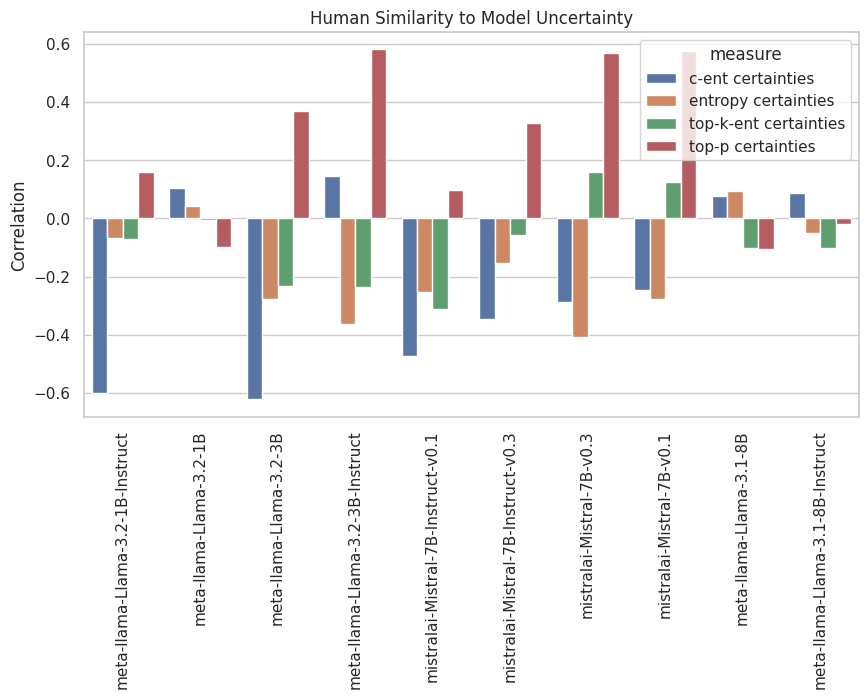

In [ ]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']
new = []
for measure in measures:
  temp = get_correlation_ent(df, measure = measure)
  new.append(temp)

temp = new[0]
for i in range(1, len(new)):
  temp = temp.merge(new[i], how='inner')

melted = temp.melt(id_vars=['model', 'params'], var_name='measure', value_name='correlation')
melted = melted.sort_values(['params', 'measure'], ascending=True)

sns.barplot(x='model', y='correlation', hue='measure', data=melted)
# label plot as human similarity to model uncertainty correlated with model size
plt.title('Human Similarity to Model Uncertainty')
plt.xlabel('')
plt.ylabel('Correlation')
#rotate x labels
plt.xticks(rotation=90)
# figure size 10 5 seaborn
plt.gcf().set_size_inches(10,5)
plt.show()

melted_ent = melted

temp_ent = melted.groupby('measure')[['correlation', 'params']].apply(lambda x: x.corr().iloc[0,1]).reset_index()

## How well do series value based uncertainty measures align with human uncertainty?

Some of these correlate well. Keep in mind, that each row is a series for the humans and the model. High correlation for a model and measure pair suggests that the series across model and human tended to correlate within each series. However, this sort of method may not be interpretable. The model's values for a different question, while consistent within that question, may not have any relationship to another question's uncertainty series.

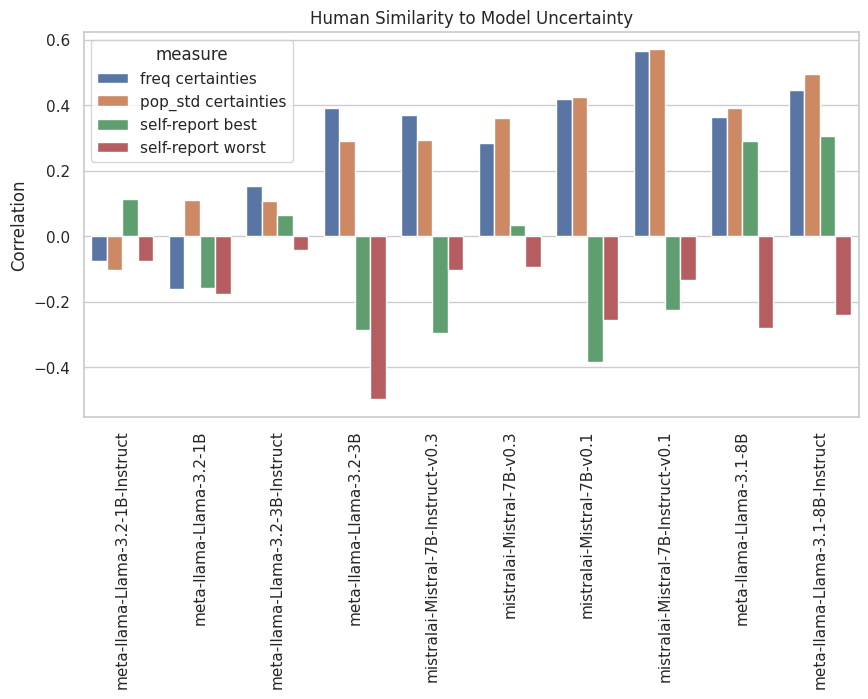

In [ ]:
measures = ['pop_std certainties', 'freq certainties', 'self-report best', 'self-report worst']
new = []
for measure in measures:
  temp = get_correlation_series(df, measure = measure)
  new.append(temp)

temp = new[0]
for i in range(1, len(new)):
  temp = temp.merge(new[i], how='inner')

melted = temp.melt(id_vars=['model', 'params'], var_name='measure', value_name='correlation')
melted = melted.sort_values(['params', 'measure'], ascending=True)

sns.barplot(x='model', y='correlation', hue='measure', data=melted)
# label plot as human similarity to model uncertainty correlated with model size
plt.title('Human Similarity to Model Uncertainty')
plt.xlabel('')
plt.ylabel('Correlation')
#rotate x labels
plt.xticks(rotation=90)
# figure size 10 5 seaborn
plt.gcf().set_size_inches(10,5)
plt.show()

# sns.barplot(x='measure', y='correlation', hue='model', data=melted)
# # label plot as human similarity to model uncertainty correlated with model size
# plt.title('Human Similarity to Model Uncertainty')
# plt.xlabel('')
# plt.ylabel('Correlation')
# #rotate x labels
# plt.xticks(rotation=90)
# # figure size 10 5 seaborn
# plt.gcf().set_size_inches(10,5)

# # move legend out of plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

temp_series = melted.groupby('measure')[['correlation', 'params']].apply(lambda x: x.corr().iloc[0,1]).reset_index()
melted_series = melted

# Same question but looking across both series and entropy methods

It is clear that some methods do correlate with their human population counterpart. That's good as it suggests alignment.

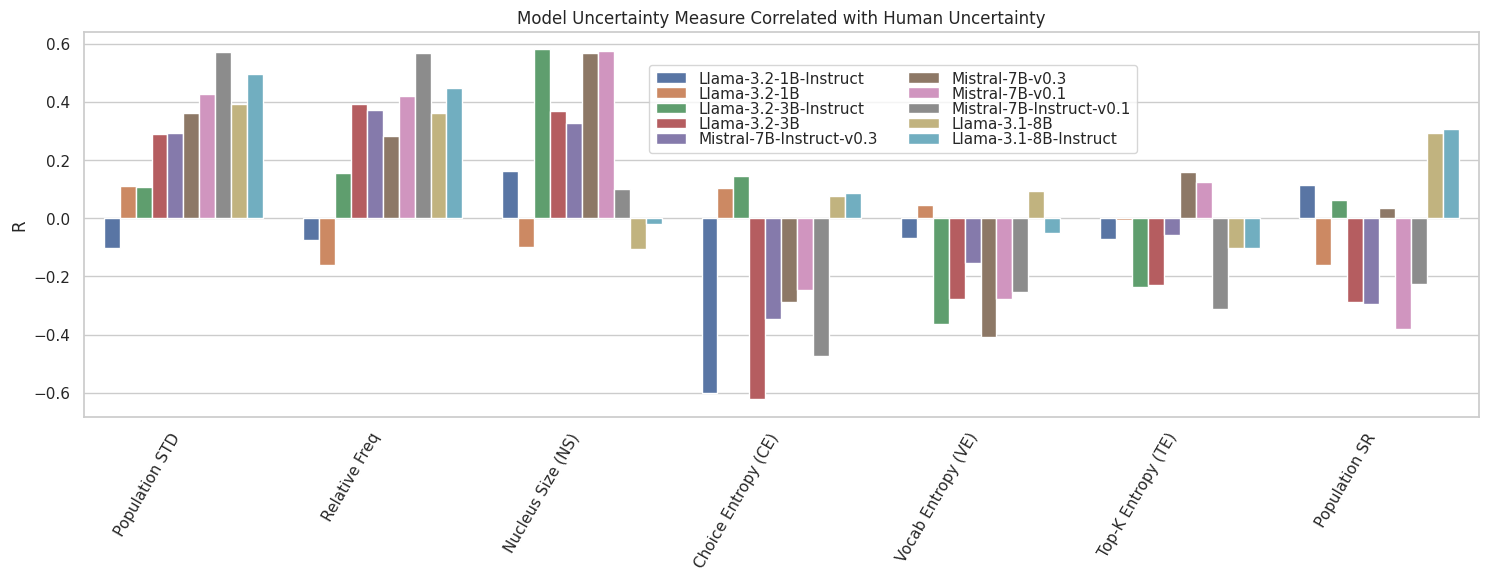

In [502]:
def map_measure(string):
  map = {
  "self report": "Self-Report (SR)",
  "freq certainties" : "Relative Freq",
  "top-p certainties" : "Nucleus Size (NS)",
  "entropy certainties" : "Vocab Entropy (VE)",
  "c-ent certainties" : "Choice Entropy (CE)",
  "top-k-ent certainties" : "Top-K Entropy (TE)",
  "pop_std certainties" : "Population STD",
  "self-report best" : "Population SR",
  "All Combined" : "NS + CE + VE + TE",
  'NS and CE combined': "NS + CE"}

  if string in map:
    return map[string]
  else:
    return string

def map_model(string):
  consume = ['meta-llama-', 'mistralai-']
  for c in consume:
    string = string.replace(c, '')
  return string

melted = pd.concat([melted_ent, melted_series], axis=0)
melted['sort mean'] = melted.groupby('measure')['correlation'].transform(lambda x: np.abs(x.mean()))
melted = melted.sort_values(['sort mean', 'measure'], ascending=False)

new = melted.copy()
new = new[new['measure'] != 'self-report worst']
new['measure'] = new['measure'].apply(lambda x: map_measure(x))
new['model'] = new['model'].apply(lambda x: map_model(x))


sns.barplot(x='measure', y='correlation', hue='model', data=new)
# label plot as human similarity to model uncertainty correlated with model size
plt.title('Model Uncertainty Measure Correlated with Human Uncertainty')
plt.xlabel('')
plt.ylabel('R')
#rotate x labels
plt.xticks(rotation=60)
# right hand align x ticks
plt.xticks(ha='right')
# figure size 10 5 seaborn
plt.gcf().set_size_inches(18,5)

# scale legend
plt.legend(loc='center left', bbox_to_anchor=(0.4, 0.8), ncol=2, labelspacing=0.01)
# make legend two columns of entries

plt.show()

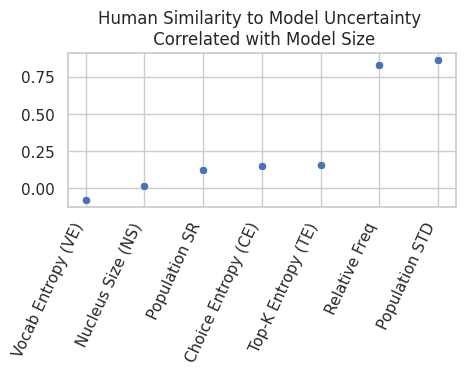

In [469]:
def map_measure(string):
  map = {
  "self report": "Self-Report (SR)",
  "freq certainties" : "Relative Freq",
  "top-p certainties" : "Nucleus Size (NS)",
  "entropy certainties" : "Vocab Entropy (VE)",
  "c-ent certainties" : "Choice Entropy (CE)",
  "top-k-ent certainties" : "Top-K Entropy (TE)",
  "pop_std certainties" : "Population STD",
  "self-report best" : "Population SR",
  "All Combined" : "NS + CE + VE + TE",
  'NS and CE combined': "NS + CE"}

  if string in map:
    return map[string]
  else:
    return string

combo = pd.concat([temp_ent, temp_series], axis=0)
combo = combo.rename(columns={0:'correlation'}).sort_values('correlation', ascending=True)
# combo.plot.scatter(x='measure', y='correlation', rot=60, figsize=(10,5))

# generate plot and figure with size
fig, ax = plt.subplots(figsize=(5,2))

new = combo.copy()
new = new[new['measure'] != 'self-report worst']
new['measure'] = new['measure'].apply(lambda x: map_measure(x))
sns.scatterplot(x='measure', y='correlation', data=new, ax=ax)

# rotate x label
plt.xticks(rotation=65)
# left justify x ticks
plt.xticks(ha='right')
# remove x label
ax.set(xlabel=None)
ax.set(ylabel=None)

# label plot as human similarity to model uncertainty correlated with model size
plt.title('Human Similarity to Model Uncertainty \n Correlated with Model Size')
# plt.ylabel('R')
plt.show()

### Can we predict the human uncertainty from the model's uncertainty


In [ ]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']

def fit_line_ent(df, df_test = None, measure = 'c-ent certainties', human = 'human c-ent', plot = False):
  if df_test is None:
    df_test = df.copy()

  m, b = fit_line(df[measure], df[human])
  interval = linear_fit_conf(df[measure], df[human], m)
  r_2 = r_2_metric(df_test[measure], df_test[human], m, b)
  mse = ((df_test[human] - (df_test[measure]*m+b))**2).mean()

  if plot:
    print(f'r^2 metric: {r_2}')

    #plot line and scatter with seaborn
    sns.regplot(x=measure, y=human, data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title('Regression of Model to Human Uncertainty ' + df['model'].iloc[0])
    plt.xlabel(measure)
    plt.ylabel(human)
    plt.gcf().set_size_inches(10,5)
    plt.show()

  return m, b, interval, r_2, mse


def fit_line_ent_all(df, df_test= None, human = 'human c-ent', measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties'], plot = False):
  rs = []
  mses = []
  for measure in measures:

    x = np.linspace(df[measure].min(), df[measure].max(), 100)
    m, b, intr, r, mse = fit_line_ent(df, df_test=df_test, measure = measure, human = human, plot=plot)
    # plt.plot(x, m*x+b, label=f'{measure} r^2: {r}')
    rs.append(r)
    mses.append(mse)

    # plt.scatter(df[measure], df[human], s=10)

  # plt.legend()
  # plt.title('Regression of Model to Human Uncertainty ' + df['model'].iloc[0])
  # plt.xlabel('Model Uncertainty')
  # plt.ylabel('Human Uncertainty')
  # plt.gcf().set_size_inches(10,5)
  # plt.show()
  return rs, mses, measures

temp1 = df.groupby('model').apply(lambda x: fit_line_ent_all(x))



Optimal slope (m): 18679.393736481215
Optimal intercept (b): -13109.845393384661
95% confidence interval for slope: (-60269.68142950097, 97628.4689024634)
learned m is standard deviations from zero: 0.4732010779660114
Optimal slope (m): 1.5503406727568292
Optimal intercept (b): 3.2111114862064496
95% confidence interval for slope: (-3.802662178681892, 6.9033435241955505)
learned m is standard deviations from zero: 0.5792414896024745
Optimal slope (m): -3.584429855167533
Optimal intercept (b): 0.20635792823254073
95% confidence interval for slope: (-14.664162188501075, 7.495302478166009)
learned m is standard deviations from zero: -0.6470246297166804
Optimal slope (m): -1.1792342851222837
Optimal intercept (b): 2.6267403351469456
95% confidence interval for slope: (-4.716336289371974, 2.357867719127406)
learned m is standard deviations from zero: -0.6667799140117983
Optimal slope (m): 159692.54318288056
Optimal intercept (b): -112102.17691744545
95% confidence interval for slope: (-4246

<ipython-input-416-58de870aae6a>:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp1 = df.groupby('model').apply(lambda x: fit_line_ent_all(x))


In [ ]:
measures = ['pop_std certainties', 'freq certainties', 'self-report best', 'self-report worst']

def fit_line_series(df, measure = 'pop_std certainties', human = 'human response percentages', plot = False):
  vars = zip(df[measure].to_list(), df[human].to_list())
  lines = [fit_line(x,y) for x,y in vars]
  intervals = [linear_fit_conf(x, y, line[0]) for x,y,line in zip(vars, lines)]

  m = np.mean([line[0] for line in lines])
  b = np.mean([line[1] for line in lines])
  interval = (np.mean([interval[0] for interval in intervals]), np.mean([interval[1] for interval in intervals]))

  temp = df[[human, measure]].explode([human, measure]).reset_index().astype(float)
  r_2 = r_2_metric(temp[measure], temp[human], m, b)
  mse = MSE(temp[measure], temp[human], m, b)

  if plot:
    print(f'r^2 metric: {r_2}')

    #plot line and scatter with seaborn
    sns.regplot(x=measure, y=human, data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title('Regression of Model to Human Uncertainty' + df['model'].iloc[0])
    plt.xlabel(measure)
    plt.ylabel(human)
    plt.gcf().set_size_inches(10,5)
    plt.show()

  return m, b, interval, r_2, mse



def fit_line_series_all(df, human = 'human response percentages', measures = ['pop_std certainties', 'freq certainties', 'self-report best', 'self-report worst']):
  rs = []
  mses = []
  for measure in measures:
    # temp = df[[human, measure]].explode([human, measure]).astype(float)
    temp = df
    # x = np.linspace(temp[measure].min(), temp[measure].max(), 100)
    m, b, intr, r, mse = fit_line_series(temp, measure = measure, human = human)
    # plt.plot(x, m*x+b, label=f'{measure} r^2: {r}')
    rs.append(r)
    mses.append(mse)

  # plt.legend()
  # plt.title('Regression of Model to Human Uncertainty ' + df['model'].iloc[0])
  # plt.xlabel('Model Uncertainty')
  # plt.ylabel('Human Uncertainty')
  # plt.gcf().set_size_inches(10,5)
  # plt.show()
  return rs, mses, measures


temp2 = df.groupby('model').apply(lambda x: fit_line_series_all(x))

Optimal slope (m): 0.03411616354953341
Optimal intercept (b): 0.24750000000000003
Optimal slope (m): 0.14999999999999997
Optimal intercept (b): 0.505
Optimal slope (m): -5.8714691837566315
Optimal intercept (b): 6.666666666666666
Optimal slope (m): 0.35000000000000003
Optimal intercept (b): 0.495
Optimal slope (m): -0.42
Optimal intercept (b): 0.5
Optimal slope (m): 0.1987397914219055
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): -0.14999999999999997
Optimal intercept (b): 0.495
Optimal slope (m): 0.006501339906119622
Optimal intercept (b): 0.24750000000000003
Optimal slope (m): 0.42
Optimal intercept (b): 0.5
Optimal slope (m): -0.09020656663169885
Optimal intercept (b): 0.2475
Optimal slope (m): 0.6300000000000001
Optimal intercept (b): 0.495
Optimal slope (m): 0.6100000000000001
Optimal intercept (b): 0.5050000000000002
Optimal slope (m): -0.48
Optimal intercept (b): 0.47
Optimal slope (m): -0.04402285575791155
Optimal intercept (b): 0.3333333333333333
Optimal slope (

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/di

Optimal slope (m): 0.14999999999999997
Optimal intercept (b): 0.505
Optimal slope (m): -0.0469755786304639
Optimal intercept (b): 0.25
Optimal slope (m): 0.24108042000254185
Optimal intercept (b): 0.2575
Optimal slope (m): -0.15951886971806525
Optimal intercept (b): 0.33
Optimal slope (m): 0.1981028379978849
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): 0.10972477746788672
Optimal intercept (b): 0.33333333333333337
Optimal slope (m): 2.662292772615381
Optimal intercept (b): 6.666666666666666
Optimal slope (m): -0.6200000000000001
Optimal intercept (b): 0.5
Optimal slope (m): -0.8200000000000001
Optimal intercept (b): 0.5
Optimal slope (m): -0.54
Optimal intercept (b): 0.4900000000000001
Optimal slope (m): -0.061822730379746976
Optimal intercept (b): 0.24750000000000003
Optimal slope (m): 0.52
Optimal intercept (b): 0.5
Optimal slope (m): 0.21999999999999997
Optimal intercept (b): 0.5
Optimal slope (m): 0.14999999999999997
Optimal intercept (b): 0.495
Optimal slope (m): 0

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/di

In [ ]:
def combine_measures_r2(df, full_df):

  df = df.reset_index()
  df['r2'] = df.apply(lambda x: x[0][0], axis = 1)
  df['mse'] = df.apply(lambda x: x[0][1], axis = 1)
  df['measure'] = df.apply(lambda x: x[0][2], axis = 1)
  df = df.explode(['r2', 'mse', 'measure']).reset_index()
  df = df.merge(full_df.groupby('model').first()['params'], on='model', how='inner')
  df.drop(columns=[0], inplace=True)
  return df

result_full_train = combine_measures_r2(temp1, df)
# result = pd.concat([result, combine_measures_r2(temp2, df)], axis=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# fit a multiple linear regression to the features
def fit_mult_reg(features, output):
  model = LinearRegression()
  model.fit(features, output)
  return model

def predict_mult_reg(model, features):
  return model.predict(features)

In [ ]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']
measures2 = ['c-ent certainties', 'top-p certainties']

def fit_mult_ent(df, df_test=None, measures = measures, human = 'human c-ent', plot = False):
  if df_test is None:
    df_test = df.copy()

  # print(measures)

  model = fit_mult_reg(df[measures], df[human])
  r_2 = np.corrcoef(predict_mult_reg(model, df_test[measures]), df_test[human])[0,1]**2
  mse = ((predict_mult_reg(model, df_test[measures]) - df_test[human])**2).mean()

  return r_2, mse, ['combined'], model



temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures))
fit = temp
temp = combine_measures_r2(temp, df)
temp['measure'] = 'All Combined'

result_full_train = pd.concat([result_full_train, temp], axis=0)

# again for measures 2

temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures2))
temp = combine_measures_r2(temp, df)
temp['measure'] = 'NS and CE combined'

result_full_train = pd.concat([result_full_train, temp], axis=0)

<ipython-input-419-12617d2d08fa>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures))
<ipython-input-419-12617d2d08fa>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures2))


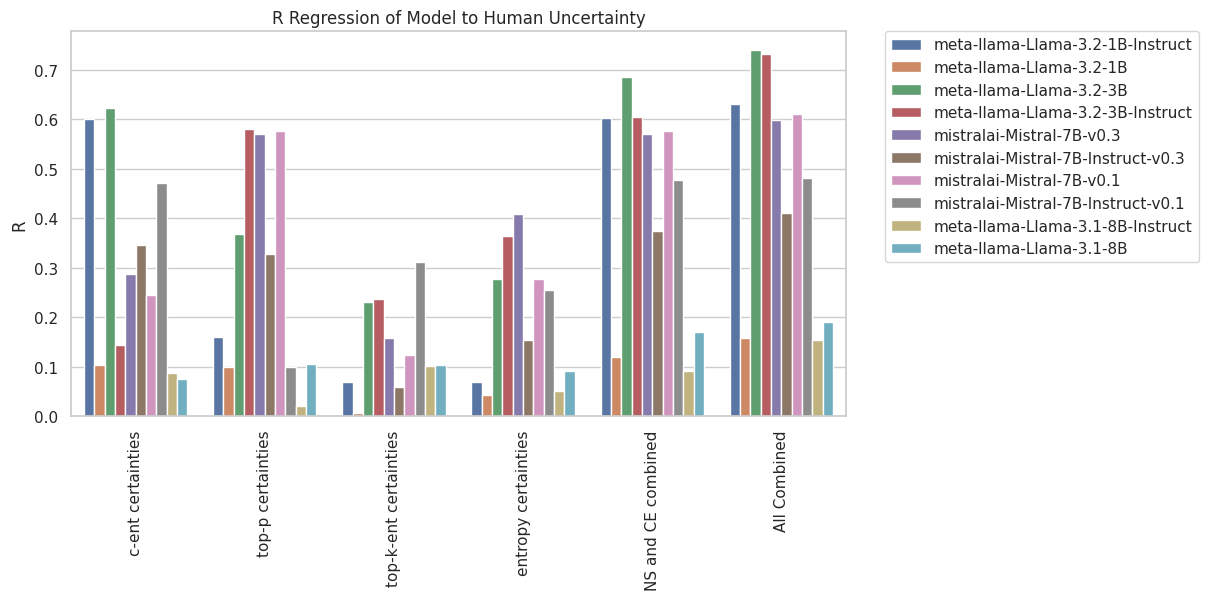

In [ ]:
result_full_train['r'] = result_full_train['r2'].apply(lambda x: np.sqrt(x))
result_full_train = result_full_train.sort_values(['params'], ascending=True)
sns.barplot(x='measure', y='r', hue='model', data=result_full_train)
plt.title('R Regression of Model to Human Uncertainty')
plt.xlabel('')
plt.ylabel('R')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)

# move legend out of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<ipython-input-294-359c5f298546>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = temp.groupby('model').apply(lambda x: x['learned'].apply(lambda x: stdNorm(np.abs(x.coef_)))).reset_index()


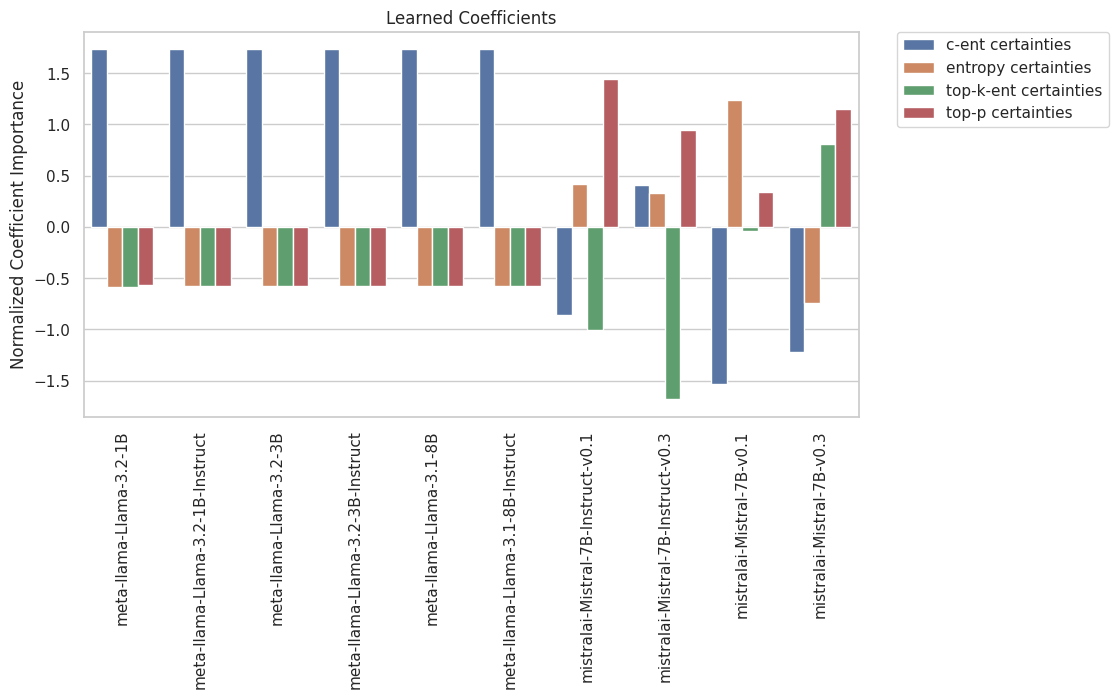

In [ ]:
temp = fit.copy()
temp = temp.reset_index()
temp['learned'] = temp.apply(lambda x: x[0][3], axis = 1)
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']

temp = temp.groupby('model').apply(lambda x: x['learned'].apply(lambda x: stdNorm(np.abs(x.coef_)))).reset_index()
temp['measures'] = temp['learned'].apply(lambda x: measures)
temp = temp.explode(['learned', 'measures'])
temp = temp.merge(df.groupby('model').first()['params'], on='model', how='inner')
temp['vendor'] = temp['model'].str.split('-').str[0]
temp = temp.sort_values(['vendor', 'params'], ascending = True)

sns.barplot(x='model', y='learned', hue='measures', data=temp)
plt.title('Learned Coefficients')
plt.xlabel('')
plt.ylabel('Normalized Coefficient Importance')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)

# move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Train a model on top p and c ent

In [ ]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']
measures2 = ['c-ent certainties', 'top-p certainties']

# folds = 3
folds = 3

combined_results = []
combined2_results = []
individual_results = []

df = df.sample(frac=1, random_state=42)

questions = df['Questions'].unique().shape[0]

for num in range(folds):
  # get fold start
  start = int(num/folds*questions)
  # get fold end
  end = int((num+1)/folds*questions)
  print(start, end)

  grouped = df.groupby('Questions')
  group_dict = dict(list(grouped))
  selected_keys = list(group_dict.keys())[start:end]

  df_test = pd.concat([group_dict[key] for key in selected_keys])
  df_train = df[~df.Questions.isin(df_test.Questions)]

  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures)))
  combined2_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures2)))
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))




0 12


<ipython-input-281-57b50cb57c86>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures)))
<ipython-input-281-57b50cb57c86>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined2_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, d

Optimal slope (m): 40935.492629391774
Optimal intercept (b): -28730.68486649678
95% confidence interval for slope: (-63509.469694309846, 145380.4549530934)
learned m is standard deviations from zero: 0.7838672487146335
Optimal slope (m): 1.607394128438944
Optimal intercept (b): 4.334016032228641
95% confidence interval for slope: (-8.194597930040741, 11.40938618691863)
learned m is standard deviations from zero: 0.3279729505694488
Optimal slope (m): -4.638419783604886
Optimal intercept (b): 1.0453632061186529
95% confidence interval for slope: (-19.13953178902108, 9.862692221811308)
learned m is standard deviations from zero: -0.6397329779774719
Optimal slope (m): -1.6966074913460998
Optimal intercept (b): 3.8307247341167474
95% confidence interval for slope: (-7.855060369406764, 4.461845386714564)
learned m is standard deviations from zero: -0.5509849713684494
Optimal slope (m): 420863.3594533455
Optimal intercept (b): -295443.3846148505
95% confidence interval for slope: (-859504.716

<ipython-input-281-57b50cb57c86>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))
<ipython-input-281-57b50cb57c86>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test

Optimal slope (m): 16460.234082854047
Optimal intercept (b): -11552.899263520598
95% confidence interval for slope: (-79668.82353048016, 112589.29169618826)
learned m is standard deviations from zero: 0.34246115569057284
Optimal slope (m): 1.616749259828845
Optimal intercept (b): 2.86626319213672
95% confidence interval for slope: (-3.373058049486265, 6.606556569143955)
learned m is standard deviations from zero: 0.6480207188805278
Optimal slope (m): -3.099000511672906
Optimal intercept (b): 0.08740476601358016
95% confidence interval for slope: (-14.746501851503346, 8.548500828157536)
learned m is standard deviations from zero: -0.5321313853084338
Optimal slope (m): -1.1195397074550546
Optimal intercept (b): 2.2843223122202874
95% confidence interval for slope: (-4.460813790251973, 2.221734375341864)
learned m is standard deviations from zero: -0.6701274302633137
Optimal slope (m): 75134.53240760684
Optimal intercept (b): -52743.005505196124
95% confidence interval for slope: (-511012

<ipython-input-281-57b50cb57c86>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures)))
<ipython-input-281-57b50cb57c86>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined2_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, d

Optimal slope (m): 4429.490427645649
Optimal intercept (b): -3107.850148635811
95% confidence interval for slope: (-87499.45274930769, 96358.43360459899)
learned m is standard deviations from zero: 0.09636770041224897
Optimal slope (m): 0.8984693325004627
Optimal intercept (b): 2.053251360992492
95% confidence interval for slope: (-5.2283381535724125, 7.025276818573339)
learned m is standard deviations from zero: 0.2932911910624951
Optimal slope (m): -3.4170688690195083
Optimal intercept (b): -0.8208348007254576
95% confidence interval for slope: (-19.236410522539774, 12.40227278450076)
learned m is standard deviations from zero: -0.43201151398852433
Optimal slope (m): -0.6865461888929724
Optimal intercept (b): 1.6239789335121115
95% confidence interval for slope: (-4.769416663813476, 3.3963242860275313)
learned m is standard deviations from zero: -0.33630564237105265
Optimal slope (m): 140164.0741068687
Optimal intercept (b): -98393.78146102776
95% confidence interval for slope: (-406

<ipython-input-281-57b50cb57c86>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))


<ipython-input-477-d13929bdc5f5>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sortby['sort'] = range(1, len(sortby) + 1)


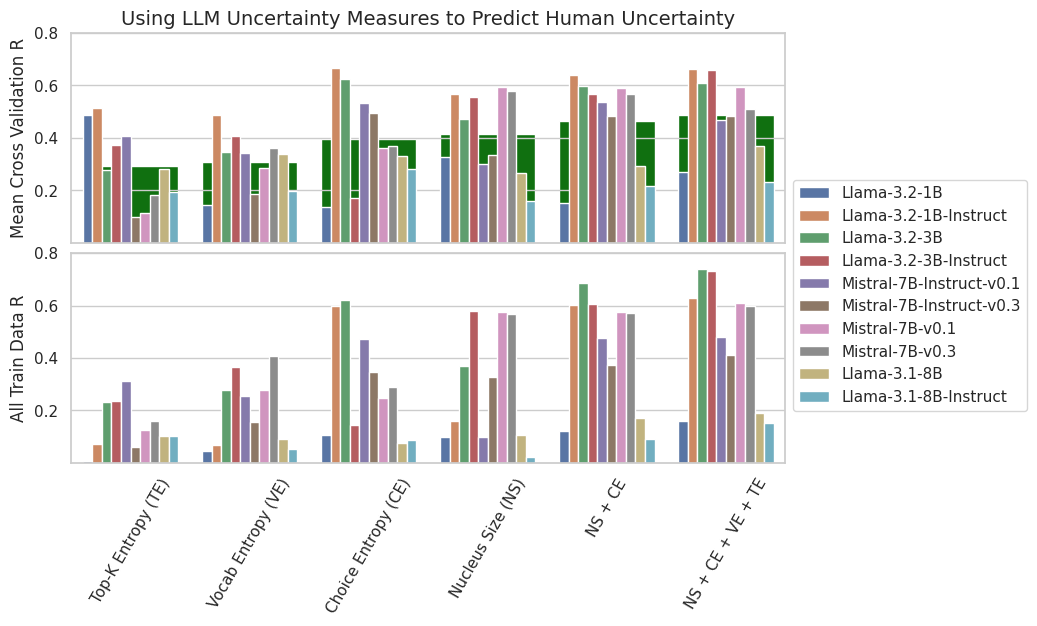

In [477]:
def map_measure(string):
  map = {
  "self report": "Self-Report (SR)",
  "freq" : "Relative Freq",
  "top-p certainties" : "Nucleus Size (NS)",
  "entropy certainties" : "Vocab Entropy (VE)",
  "c-ent certainties" : "Choice Entropy (CE)",
  "top-k-ent certainties" : "Top-K Entropy (TE)",
  "pop std" : "Population STD",
  "pop sr" : "Population SR",
  "All Combined" : "NS + CE + VE + TE",
  'NS and CE combined': "NS + CE"}

  if string in map:
    return map[string]
  else:
    return string

def map_model(string):
  consume = ['meta-llama-', 'mistralai-']
  for c in consume:
    string = string.replace(c, '')
  return string


temp1 = pd.concat(individual_results)
temp1 = combine_measures_r2(temp1, df)
temp1.sort_values(['model'], inplace=True)
result = temp1.groupby(['model', 'measure'])['r2'].mean().reset_index()

temp2 = pd.concat(combined_results)
temp2 = combine_measures_r2(temp2, df)
temp2.sort_values(['model'], inplace=True)
temp2 = temp2.groupby('model')['r2'].mean().reset_index()
temp2['measure'] = 'All Combined'

temp3 = pd.concat(combined2_results)
temp3 = combine_measures_r2(temp3, df)
temp3.sort_values(['model'], inplace=True)
temp3 = temp3.groupby('model')['r2'].mean().reset_index()
temp3['measure'] = 'NS and CE combined'

result = pd.concat([result, temp2, temp3], axis=0)

result['r'] = result['r2'].apply(lambda x: np.sqrt(x))
# result['r'] = result['r2'].apply(lambda x: x)
result = result.merge(df.groupby('model').first().reset_index()[['params', 'model']], on='model', how='inner')


means = result.groupby(['measure'])['r'].mean().reset_index()[['r', 'measure']]
means = means.rename(columns={'r':'mean'})
result = result.merge(means, on='measure', how='inner')
result = result.sort_values(['mean', 'params'], ascending=True)

sortby = result[['model', 'measure']]
sortby['sort'] = range(1, len(sortby) + 1)


# remove substring from model
result['model'] = result['model'].apply(lambda x: map_model(x))

means['measure'] = means['measure'].apply(lambda x: map_measure(x))
result['measure'] = result['measure'].apply(lambda x: map_measure(x))

# create a over under subplot
fig, axs = plt.subplots(2, 1, figsize=(8,5))
# make plots share axes
fig.tight_layout()

sns.barplot(x='measure', y='r', hue='model', data=result, ax = axs[0])

# adjust labels for ax
axs[0].set_xticklabels('')
# turn off x labels
axs[0].set_xlabel('')
axs[0].set_ylabel('Mean Cross Validation R')
axs[0].set_title('Using LLM Uncertainty Measures to Predict Human Uncertainty', fontsize=14)


# plot the mean of each of the measures behind the bars
sns.barplot(x='measure', y='mean', data=means, color='green', zorder=0, ax=axs[0])

# move legend out of plot
axs[0].legend(bbox_to_anchor=(1.01, 0.3), loc=2, borderaxespad=0.)


new = result_full_train.merge(sortby, on=['model', 'measure'], how='inner').sort_values(['sort'], ascending=True)
new['measure'] = new['measure'].apply(lambda x: map_measure(x))
# new = result_full_train
new['r'] = new['r2'].apply(lambda x: np.sqrt(x))
sns.barplot(x='measure', y='r', hue='model', data=new, ax=axs[1])

axs[1].set_ylabel('All Train Data R')
plt.xticks(rotation=60)
axs[1].get_legend().remove()

axs[0].set(xlabel=None)
axs[1].set(xlabel=None)

# set y limits
axs[0].set_ylim(0,0.8)
axs[1].set_ylim(0,0.8)

# remove the first y tick
axs[0].set_yticks(axs[0].get_yticks()[1:])
axs[1].set_yticks(axs[1].get_yticks()[1:])




fig.subplots_adjust(hspace=0.05)
plt.show()

